<a id='table'></a>

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> |</span></b> Table of contents</b></p>
</div>

* [1. Introduction](#Introduction)
* [2. Pima Indians Diabetes Database](#Data)
* [3. GAN model](#GAN)
* [4. Quality assessment](#Quality)
* [Conclusion](#Conclusion)


<a id='Introduction'></a>

# <b><span style='color:#F1A424'>| 1.</span> Introduction </b>

[Table of contents](#table)

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 1.1. </span></b> About the NoteBook </b></p>
</div>

[Table of contents](#table)

### Generative Adversarial Network
A Generative Adversarial Network (GAN) is a type of deep learning architecture composed of two neural networks: a generator and a discriminator. The generator is trained to generate new data samples that are similar to a given set of real data samples, while the discriminator is trained to distinguish between the generated samples and the real samples. The two networks are trained in a competition with each other where the generator tries to produce samples that are indistinguishable from the real samples and the discriminator tries to correctly identify whether a sample is real or generated.

### Code
In the following NoteBook, the generator is a neural network that takes a random noise vector as input and generates a sample of fake data. The discriminator is another neural network that takes a sample of either real or generated data as input and outputs a scalar indicating the probability that the sample is real. The generator and discriminator are trained together in an adversarial manner, where the generator tries to generate samples that are classified as real by the discriminator, and the discriminator tries to correctly identify whether a sample is real or generated. The generator and discriminator are trained iteratively, alternating between updating the generator and the discriminator, until they reach convergence and the generated samples become indistinguishable from the real samples.

https://samanemami.github.io/

In [1]:
import os
import logging
import numpy as np
import tensorflow as tf
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tf.get_logger().setLevel(logging.ERROR)


2023-08-04 16:44:26.695973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-04 16:44:26.695996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, make_scorer
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from collections import Counter

<a id='Data'></a>

#  <b><span style='color:#F1A424'>| 2. </span> Tabular Data</b>


<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 2.1. </span></b> Pima Indians Diabetes Database </b></p>
</div>

[Table of contents](#table)



In [3]:
from imblearn.datasets import fetch_datasets

dset_name = 'webpage'
dset = fetch_datasets()[dset_name]


def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df


X, y = StandardScaler().fit_transform(dset.data), dset.target

y[y == -1] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
X_train_pos = X_train[y_train == 1]

In [5]:
X_train.shape

(27824, 300)

<a id='GAN'></a>
#  <b><span style='color:#F1A424'>| 3. </span> Gan Model</b>

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 3.1. </span></b> GAN Class
 </b></p>
</div>

[Table of contents](#table)

#### how to implement a  <b><span style='color:#F1A424'>GAN </span></b> using TensorFlow and generate fake tabular data from real data;


* Define the generator model: The generator model is a neural network that takes a random noise vector as input and generates a sample of fake data. In this code, the generator model is defined using the Sequential class from TensorFlow and consists of two dense layers with ReLU activation.

* Define the discriminator model: The discriminator model is another neural network that takes a sample of either real or generated data as input and outputs a scalar indicating the probability that the sample is real. In this code, the discriminator model is also defined using the Sequential class from TensorFlow and consists of two dense layers with ReLU activation, followed by a single dense layer with a sigmoid activation.

* Define the combined model: The combined model is used to train the generator, and it consists of the generator and the discriminator connected together. The generator model is connected to the discriminator model by setting the discriminator to be non-trainable, which means that the gradients from the discriminator are not used to update its parameters during training.

* Load the real data: The code loads the real data from a .csv file using Pandas and converts it to a Numpy array.

* Train the GAN: The GAN is trained using a for-loop that trains the discriminator and the generator alternately. In each iteration, the discriminator is trained on a batch of real and generated data using discriminator.train_on_batch(X, labels), where X is a concatenation of real data and generated data, and labels is a vector indicating whether each sample is real or generated. The generator is then trained using the combined.train_on_batch(noise, np.ones(batch_size)) method, where noise is a random noise vector, and np.ones(batch_size) is a vector of ones with the same length as the batch size.

* Generate fake samples: After the GAN has been trained, the code generates fake samples by feeding random noise into the generator model using generator.predict(noise).

https://samanemami.medium.com/


In [6]:
# https://samanemami.github.io/
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 200

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):
            
            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


            print('>%d, d1=%.3f, d2=%.3f' %(epoch+1, d_loss, g_loss))

        return generator


<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 3.2. </span></b> Generating synthetic data
 </b></p>
</div>

In [7]:
model = Gan(data=X_train_pos)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model)

2023-08-04 16:45:04.512191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-04 16:45:04.512233: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-04 16:45:04.512259: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-Modern-15-A5M): /proc/driver/nvidia/version does not exist
2023-08-04 16:45:04.512569: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


>1, d1=1.429, d2=0.704
>2, d1=1.302, d2=0.674
>3, d1=1.185, d2=0.646
>4, d1=1.082, d2=0.624
>5, d1=0.984, d2=0.600
>6, d1=0.901, d2=0.578
>7, d1=0.831, d2=0.559
>8, d1=0.775, d2=0.537
>9, d1=0.734, d2=0.520
>10, d1=0.710, d2=0.502
>11, d1=0.693, d2=0.488
>12, d1=0.685, d2=0.475
>13, d1=0.683, d2=0.465
>14, d1=0.682, d2=0.449
>15, d1=0.680, d2=0.445
>16, d1=0.685, d2=0.432
>17, d1=0.688, d2=0.426
>18, d1=0.685, d2=0.421
>19, d1=0.683, d2=0.414
>20, d1=0.687, d2=0.413
>21, d1=0.684, d2=0.414
>22, d1=0.677, d2=0.414
>23, d1=0.667, d2=0.419
>24, d1=0.666, d2=0.424
>25, d1=0.656, d2=0.436
>26, d1=0.642, d2=0.445
>27, d1=0.641, d2=0.455
>28, d1=0.619, d2=0.472
>29, d1=0.601, d2=0.487
>30, d1=0.593, d2=0.502
>31, d1=0.567, d2=0.529
>32, d1=0.551, d2=0.555
>33, d1=0.533, d2=0.585
>34, d1=0.514, d2=0.617
>35, d1=0.492, d2=0.642
>36, d1=0.474, d2=0.675
>37, d1=0.456, d2=0.709
>38, d1=0.440, d2=0.745
>39, d1=0.424, d2=0.779
>40, d1=0.408, d2=0.816
>41, d1=0.394, d2=0.860
>42, d1=0.379, d2=0.901
>

In [60]:
# Samples to generate
sampling_strategy = 1
num_examples = int((Counter(y_train)[0] - Counter(y_train)[1]) * sampling_strategy)

In [61]:
noise = np.random.normal(0, 1, (X_train_pos.shape[0] + num_examples, X_train_pos.shape[1]))
new_data = _df(data=trained_model.predict(noise))

In [62]:
new_data.shape

(27039, 300)

<a id='Quality'></a>

# <b><span style='color:#F1A424'>| 4.</span> Quality assessment </b>

[Table of contents](#table)

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 4.1. </span></b> Check the quality of the generated synthetic data
 </b></p>
</div>

[Table of contents](#table)

Evaluating how well the GAN is able to generate new data that is similar to the data it was trained on. The quality can be evaluated based on various metrics, such as the visual similarity, diversity, and robustness of the generated data. The goal is to determine if the GAN is able to generate high-quality synthetic data.

https://samanemami.github.io/

Text(0.5, 1.0, 'synthetic Data')

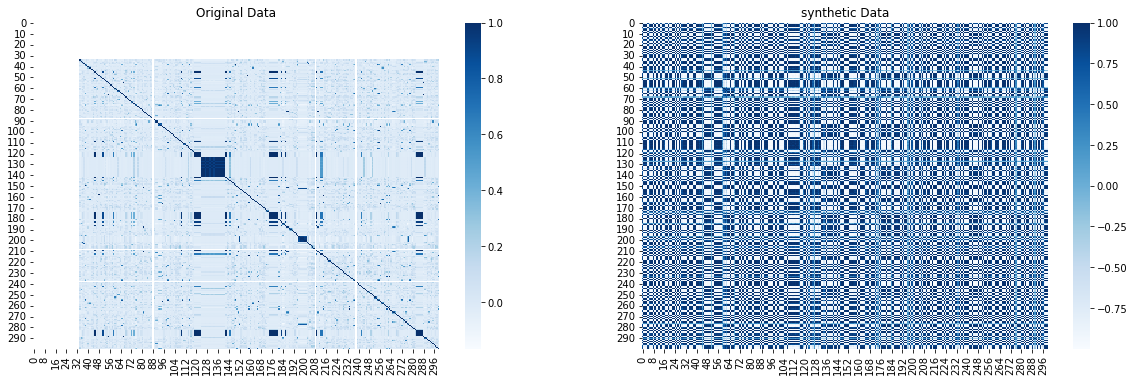

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(pd.DataFrame(X_train_pos).corr(), annot=False, ax=ax[0], cmap="Blues")
sns.heatmap(new_data.corr(), annot=False, ax=ax[1], cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

Text(0.5, 1.0, 'synthetic Data')

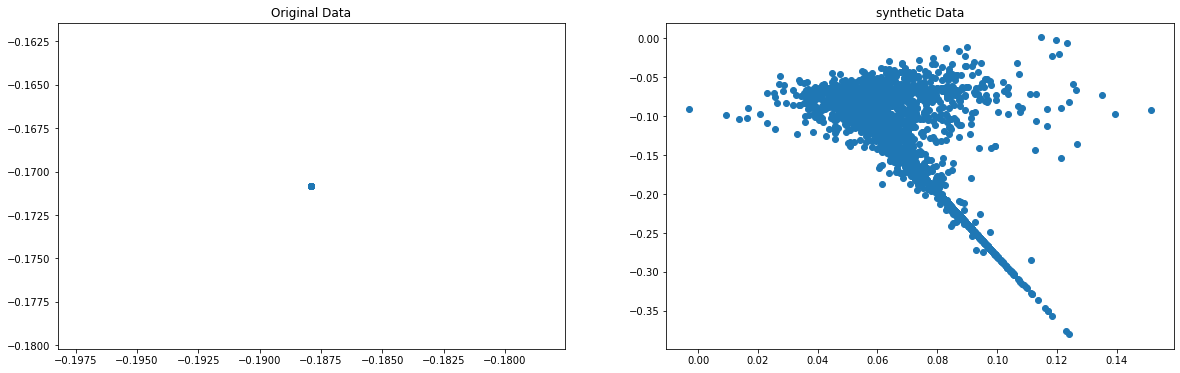

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(pd.DataFrame(X_train_pos).iloc[:, 0], pd.DataFrame(X_train_pos).iloc[:, 1])
ax[1].scatter(new_data.iloc[:, 0], new_data.iloc[:, 1])
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

<a id='Conclusion'></a>

#  <b><span style='color:#F1A424'>| </span> Conclusion </b>

[Table of contents](#table)

Generative Adversarial Networks (GANs) are a powerful deep learning architecture that can be used to generate new data samples that are similar to a given set of real data samples. GANs consist of two neural networks: a generator and a discriminator, that are trained in an adversarial manner to produce realistic data. The code I provided is a simple example of how to implement a GAN in TensorFlow and generate fake tabular data from real data.

In [55]:
# RUS

def RUS(X_res, y_res, frac=1, minority_class_id=1, random_state=42):
    X_res = pd.DataFrame(X_res)
    X_res['Class'] = y_res  
    
    X_neg = X_res[y_res != minority_class_id].sample(frac=frac, random_state=random_state)
    X_pos = X_res[y_res == minority_class_id].sample(frac=1, random_state=random_state)
    
    X_rus = pd.concat([X_neg, X_pos], ignore_index=True)

    X_eq = X_rus.drop('Class', axis=1)
    y_eq = X_rus['Class']

    return X_eq, y_eq

In [56]:
def train_val(X, y, Xt, yt, random_state=42):
    classifiers = {
        "CatBoostClassifier": CatBoostClassifier(verbose=False, random_seed=random_state),
        "LGBMClassifier": LGBMClassifier(random_state=random_state),
        "XGBClassifier": XGBClassifier(random_state=random_state),
        "BaggingClassifier": BaggingClassifier(random_state=random_state),
        "RandomForestClassifier": RandomForestClassifier(random_state=random_state),
    }
    scores = []
    predictions = []
    for key, classifier in classifiers.items():
        print('_' * 50)
        name = key
        classifier.fit(X, y)
        print("Classifier: ", name)
        y_pred = classifier.predict(Xt)
        cm = confusion_matrix(yt, y_pred)
        print(cm)
        print('')
        predictions.append(y_pred)
        tn = cm[0,0]
        fp = cm[0,1]
        fn = cm[1,0]
        tp = cm[1,1]
        tnr = tn / (tn + fp)
        tpr = tp / (tp + fn)
        scores.append(tnr * tpr)
        print('TNR:', round(tnr, 5))
        print('TPR:', round(tpr, 5))
        print('TNRxTPR:', round(tnr * tpr, 5))
        print('G-mean:', round(np.sqrt(tnr * tpr), 5))

    print('_' * 50)
    print('Ensemble predictions (majority voting):')
    predictions = np.sum(predictions, axis=0)
    predictions[predictions < 3] = 0
    predictions[predictions >= 3] = 1

    cm = confusion_matrix(yt, predictions)
    print(cm)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)
    print('')
    print('TNR:', round(tnr, 5))
    print('TPR:', round(tpr, 5))
    print('TNRxTPR:', round(tnr * tpr, 5))
    print('G-mean:', round(np.sqrt(tnr * tpr), 5))
    

In [63]:
X_res = np.concatenate((X_train, new_data))
y_res = np.concatenate((y_train, np.ones(new_data.shape[0])))

In [67]:
# RUS

X_eq, y_eq = RUS(X_res, y_res, frac=.06)

print('Resampled dataset shape %s' % Counter(y_eq))
print('Ratio->  1 :', round(Counter(y_eq)[1]/Counter(y_eq)[0], 1))

Resampled dataset shape Counter({1.0: 27824, 0.0: 1622})
Ratio->  1 : 17.2


In [68]:
train_val(X_eq, y_eq, X_test, y_test)

__________________________________________________
Classifier:  CatBoostClassifier
[[6518  242]
 [  18  178]]

TNR: 0.9642
TPR: 0.90816
TNRxTPR: 0.87565
G-mean: 0.93576
__________________________________________________
Classifier:  LGBMClassifier
[[6461  299]
 [  12  184]]

TNR: 0.95577
TPR: 0.93878
TNRxTPR: 0.89725
G-mean: 0.94723
__________________________________________________
Classifier:  XGBClassifier
[[6487  273]
 [  17  179]]

TNR: 0.95962
TPR: 0.91327
TNRxTPR: 0.87638
G-mean: 0.93615
__________________________________________________
Classifier:  BaggingClassifier
[[6160  600]
 [  25  171]]

TNR: 0.91124
TPR: 0.87245
TNRxTPR: 0.79501
G-mean: 0.89163
__________________________________________________
Classifier:  RandomForestClassifier
[[6381  379]
 [  18  178]]

TNR: 0.94393
TPR: 0.90816
TNRxTPR: 0.85725
G-mean: 0.92588
__________________________________________________
Ensemble predictions (majority voting):
[[6480  280]
 [  16  180]]

TNR: 0.95858
TPR: 0.91837
TNRxTPR: 0.8